In [1]:
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../../'); from config import *
configure_pylab()

rc('text.latex',preamble=r"\usepackage{amsmath}")
matplotlib.rc('text', usetex = True)
params= {'text.latex.preamble' : r'\usepackage{amsmath}'}
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["ytick.major.size"] = 0
plt.rcParams.update(params)

Available files:
	r2288_180515b_tet2_cell2_GC.mat
	r2289_250515b_tet2_cell2_GC.mat
	r2298_290615c_tet6_cell6_GC.mat
	r2375_070416a_tet1_cell1_GC.mat
	r2375_140416b_tet1_cell1_GC.mat
	r2375_210416a_tet3_cell3_GC.mat
	r2383_160516b_tet4_cell4_GC.mat
	r2405_011216a_cell2955.mat
	r2405_051216b_cell1816.mat
	r2405_121216b_cell1880.mat
	r2405_121216b_cell1912.mat
	r2405_191216c_cell1640.mat
	r2405_191216c_cell1662.mat
	r2405_191216c_cell1962.mat
	r2405_191216c_cell1990.mat
Fitted models in fitdir = /home/mer49/Desktop/lgcpspatial/python/notebooks/hyperparameter_fits/


In [2]:
# Grid size ( bins per linear distance ). (this must be even). You want this to
# be fine enough to simulation continuous space, but not so fine that the
# problem becomes too large. 128 is the magic number.
L      = 128    
res    = 50        # Upsampling/interpolation resolution when estimating period
Fs     = 50.0      # Sample rate of data in Hz ( samples/second )
Δt     = 1/Fs      # seconds / sample
Fl     = 0.25      # Low-frequency cutoff in Hz for smoothing path trajcetory for heading
rP     = sqrt(2)   # Range (ratio) to search for optimal period
rβ     = 10^3      # Range (ratio) to search for optimal kernel height
NP     = 11        # Period search grid resolution
Nβ     = 11        # Kernel height search grid resolutions


# Figure 1


In [3]:
dataset = 'r2405_051216b_cell1816.mat'
data    = Dataset.from_file(datadir+dataset).prepare(L,radius=7)
arena   = data.arena
(x,y),s = data.xy,data.spikes
print(data.shape)

[ 88 128]


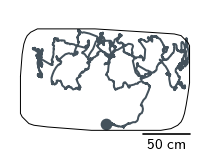

In [4]:
figure(0,(2,1.5),120)
sshow = 60*1.2
tshow = int(sshow*data.position_sample_rate)+1
plot(x[:tshow],y[:tshow],color=BLACK,lw=1.2,linestyle='-')
scatter(x[tshow],y[tshow],color=BLACK)
plot(*arena.perim_m.T,color='k',lw=.6)
axis('equal')
noxyaxes();  axis('equal')
px,py = arena.perim_m.T
xscalebar(np.max(px)-.25,.50,'50 cm',np.min(py)-px2y(5))
savefig('fig1a1_v2.pdf')
savefig('fig1a1_v2.svg')

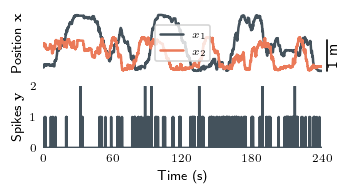

In [5]:
f = figure(0,(3,1.5),120)
subplot(211)
sshow = 240
tshow = int(sshow*data.position_sample_rate)+1
tt = arange(tshow)/data.position_sample_rate
plot(tt,x[:tshow],label='$x_1$')
plot(tt,y[:tshow],label='$x_2$')
legend()
noaxis(); nox(); noy(); xlim(0,sshow)
yscalebar(nanmin(py)+.5,1.0,'1 m',xlim()[1]+px2x(5),side='right')
ylabel('Position $\\mathbf{x}$') 
subplot(212)
st = data.spike_times_seconds*data.position_sample_rate
s2 = histogram(st,arange(len(s)+1))[0]
plot(tt,s2[:tshow])
noaxis() 
ylim(0,2); yticks([0,1,2]); ylabel('Spikes $\\mathbf{y}$') 
xlim(0,sshow); xticks([0,60,120,180,240]); xlabel('Time (s)')
f.align_ylabels()
savefig('fig1a2_v2.pdf')
savefig('fig1a2_v2.svg')

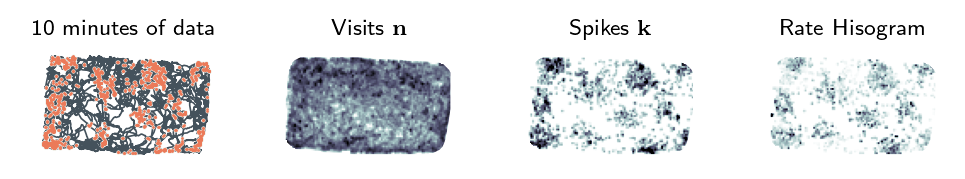

In [6]:
figure(0,(5,1.0),200)
sshow = 10*60
tshow = int(sshow*data.position_sample_rate)+1
tt = arange(tshow)/data.position_sample_rate
ax1=subplot(141)
plot(x[:tshow],y[:tshow],lw=.6,zorder=-1)
i = where(s[:tshow])[0]
scatter(x[i],y[i],color=WHITE,marker='.',lw=0,s=8)
scatter(x[i],y[i],color=RUST,marker='.',lw=0,s=4)
noxyaxes(); axis('equal'); title('10 minutes of data')
xl,yl = xlim(),ylim()
xlim(*xl); ylim(*yl)
subplot(142)
arena.imshow(log(1+data.N),cmap='bone_r',vmin=0,vmax=5,lw=1.5)
xlim(*xl); ylim(*yl); title('Visits $\\mathbf{n}$')
subplot(143)
arena.imshow(log(1+data.K),cmap='bone_r',vmin=0,vmax=1.5,lw=1.5)
xlim(*xl); ylim(*yl); title('Spikes $\\mathbf{k}$')
subplot(144)
arena.imshow(log(1+data.Y),cmap='bone_r',vmin=0,vmax=.25,lw=1.5)
xlim(*xl); ylim(*yl); title('Rate Hisogram')
tight_layout()
sca(ax1); xlim(*xl); ylim(*yl)
savefig('fig1b_v2.pdf',dpi=600)
savefig('fig1b_v2.svg',dpi=600)